### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")  # Estilo visual mais agradável
import numpy as np

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

## 🔍 Análise 01 — Faturamento Total por Loja

Nesta primeira etapa da análise, o objetivo é avaliar o desempenho bruto de cada loja da rede **Alura Store** em termos de faturamento.

Para isso, somaremos os valores da coluna **Preço** de cada base de dados, representando o total arrecadado com vendas em cada unidade.

Essa métrica fornece uma visão inicial importante para entender o volume financeiro movimentado por cada loja, e serve como um indicativo de performance comercial. Lojas com faturamento consideravelmente inferior às demais podem ser candidatas à venda por baixa eficiência ou atratividade no mercado.

A seguir, calculamos os faturamentos individuais e visualizamos os resultados em um gráfico de barras comparativo.


In [6]:
# Cálculo do faturamento total de cada loja (soma da coluna Preço)
faturamento_lojas_calculado = {
    'Loja 1': loja1['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
}


# Exibindo os resultados
for loja, valor in faturamento_lojas_calculado.items():
    print(f"{loja}: R$ {valor:,.2f}")

Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


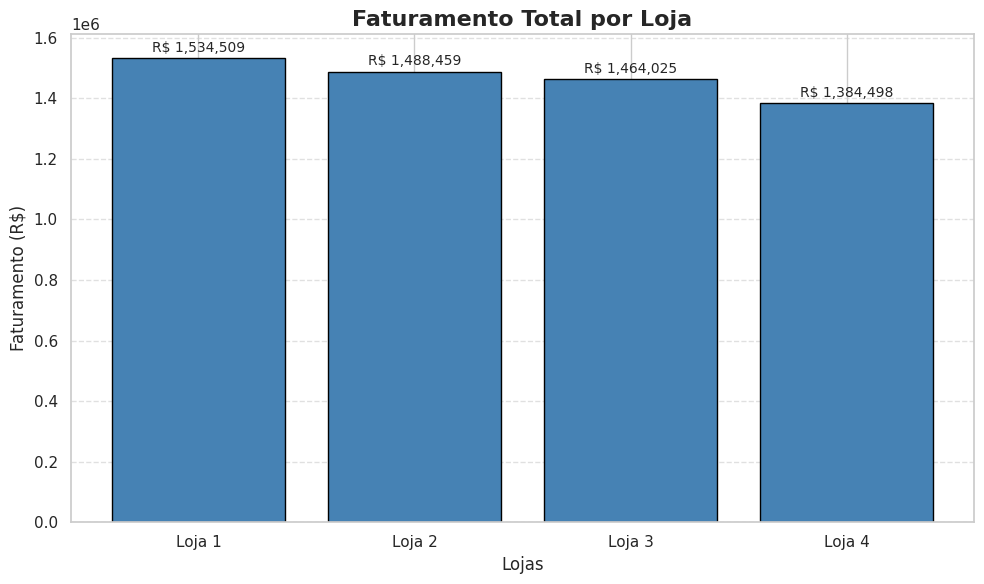

In [10]:
# Dados
lojas = list(faturamento_lojas_calculado.keys())
valores = list(faturamento_lojas_calculado.values())

# Gráfico
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(lojas, valores, color='#4682B4', edgecolor='black')  # cor azul elegante

# Adicionando os valores no topo das barras
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2,
            altura + 10000,
            f'R$ {altura:,.0f}',
            ha='center', va='bottom', fontsize=10)

# Títulos e rótulos
ax.set_title('Faturamento Total por Loja', fontsize=16, fontweight='bold')
ax.set_ylabel('Faturamento (R$)', fontsize=12)
ax.set_xlabel('Lojas', fontsize=12)

# Grade horizontal
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Layout final
plt.tight_layout()
plt.show()

### 📊 Conclusão da Análise 01 — Faturamento

Ao analisarmos o faturamento total das quatro lojas da Alura Store, observamos as seguintes cifras:

- **Loja 1:** R$ 1.534.509,12

- **Loja 2:** R$ 1.488.459,06

- **Loja 3:** R$ 1.464.025,03

- **Loja 4:** R$ 1.384.497,58

A **Loja 4** apresentou o **menor faturamento total**, com uma diferença de cerca de **R$ 150 mil a menos que a Loja 1**, que lidera o ranking.

Esse resultado sugere que a Loja 4 pode estar com **baixa performance de vendas**, seja por menor volume de pedidos, produtos menos atrativos ou outros fatores estruturais. Ainda que o faturamento isolado não seja suficiente para tomada de decisão, é um forte indicativo de desempenho abaixo do esperado.

Nas próximas etapas, cruzaremos este dado com indicadores de **satisfação dos clientes**, **eficiência logística** e **composição do portfólio de produtos** para entender melhor os motivos e reforçar (ou não) a recomendação de venda.



## 📦 Análise 02 — Vendas por Categoria

Nesta etapa, o objetivo é entender o perfil de vendas de cada loja com base nas categorias de produtos comercializados. Para isso, contabilizamos a quantidade de vendas por categoria para cada unidade da Alura Store.

Essa análise é útil para identificar:
- Quais segmentos se destacam em cada loja;
- Se há concentração de vendas em poucas categorias;
- Possíveis lacunas ou oportunidades de diversificação no portfólio.

Ao final, visualizaremos os dados por loja com gráficos de barras.


In [11]:
# Agrupar e contar categorias por loja
categorias_loja1 = loja1['Categoria do Produto'].value_counts()
categorias_loja2 = loja2['Categoria do Produto'].value_counts()
categorias_loja3 = loja3['Categoria do Produto'].value_counts()
categorias_loja4 = loja4['Categoria do Produto'].value_counts()

In [14]:
# Função para exibir o top 3 categorias com print formatado
def exibir_top3_categorias(nome_loja, df):
    top_categorias = df['Categoria do Produto'].value_counts().head(3)
    print(f"\n📍 {nome_loja} - Top 3 Categorias Mais Vendidas")
    print("-" * 45)
    for i, (categoria, qtd) in enumerate(top_categorias.items(), start=1):
        print(f"{i}. {categoria} — {qtd} vendas")

# Executar para cada loja
exibir_top3_categorias("Loja 1", loja1)
exibir_top3_categorias("Loja 2", loja2)
exibir_top3_categorias("Loja 3", loja3)
exibir_top3_categorias("Loja 4", loja4)


📍 Loja 1 - Top 3 Categorias Mais Vendidas
---------------------------------------------
1. moveis — 465 vendas
2. eletronicos — 448 vendas
3. brinquedos — 324 vendas

📍 Loja 2 - Top 3 Categorias Mais Vendidas
---------------------------------------------
1. moveis — 442 vendas
2. eletronicos — 422 vendas
3. brinquedos — 313 vendas

📍 Loja 3 - Top 3 Categorias Mais Vendidas
---------------------------------------------
1. moveis — 499 vendas
2. eletronicos — 451 vendas
3. brinquedos — 315 vendas

📍 Loja 4 - Top 3 Categorias Mais Vendidas
---------------------------------------------
1. moveis — 480 vendas
2. eletronicos — 451 vendas
3. brinquedos — 338 vendas


In [21]:
def grafico_categorias(df, nome_loja, cor='#4682B4'):
    categorias = df['Categoria do Produto'].value_counts()
    categorias = categorias.sort_values(ascending=True)  # Inverte para o barh mostrar do maior para o topo

    plt.figure(figsize=(10, 6))
    barras = plt.barh(categorias.index, categorias.values, color=cor, edgecolor='black')

    # Adicionando os valores ao lado das barras
    for barra in barras:
        largura = barra.get_width()
        plt.text(largura + 1, barra.get_y() + barra.get_height() / 2,
                 f'{int(largura)}', va='center', fontsize=10)

    plt.title(f'{nome_loja} - Vendas por Categoria', fontsize=14, weight='bold')
    plt.xlabel('Quantidade de Vendas')
    plt.ylabel('Categoria')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

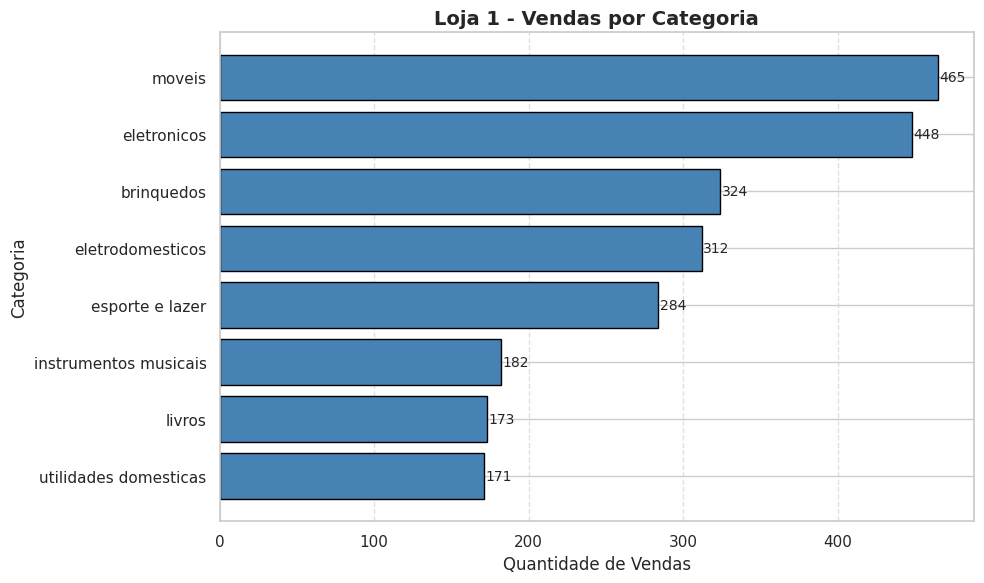

In [22]:
grafico_categorias(loja1, "Loja 1", cor='#4682B4')

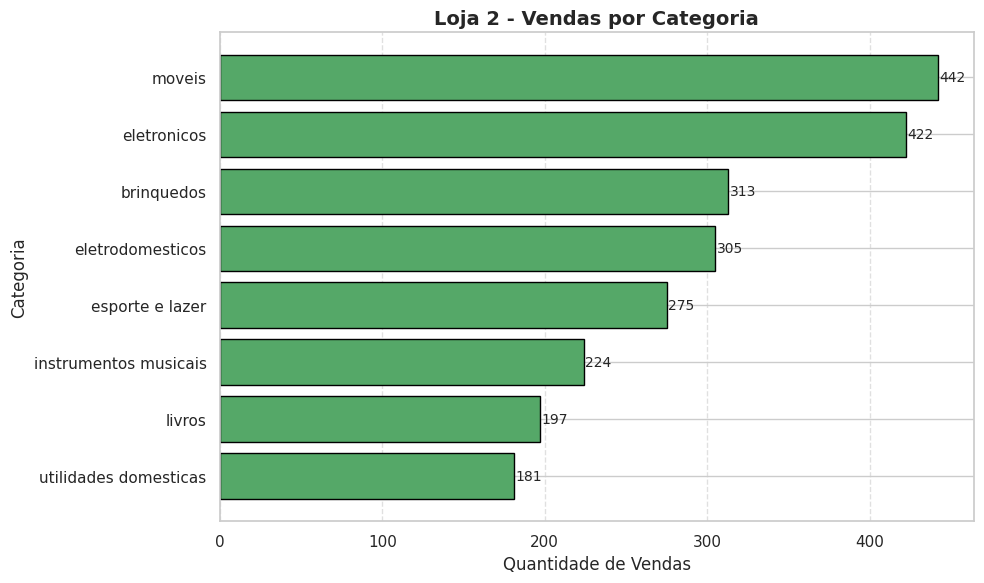

In [23]:
grafico_categorias(loja2, "Loja 2", cor='#55A868')

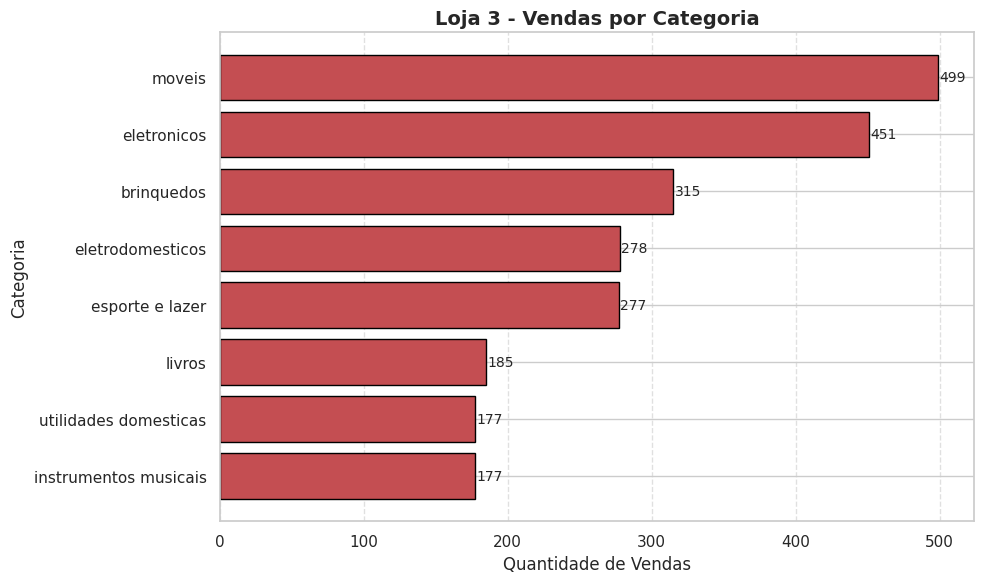

In [24]:
grafico_categorias(loja3, "Loja 3", cor='#C44E52')

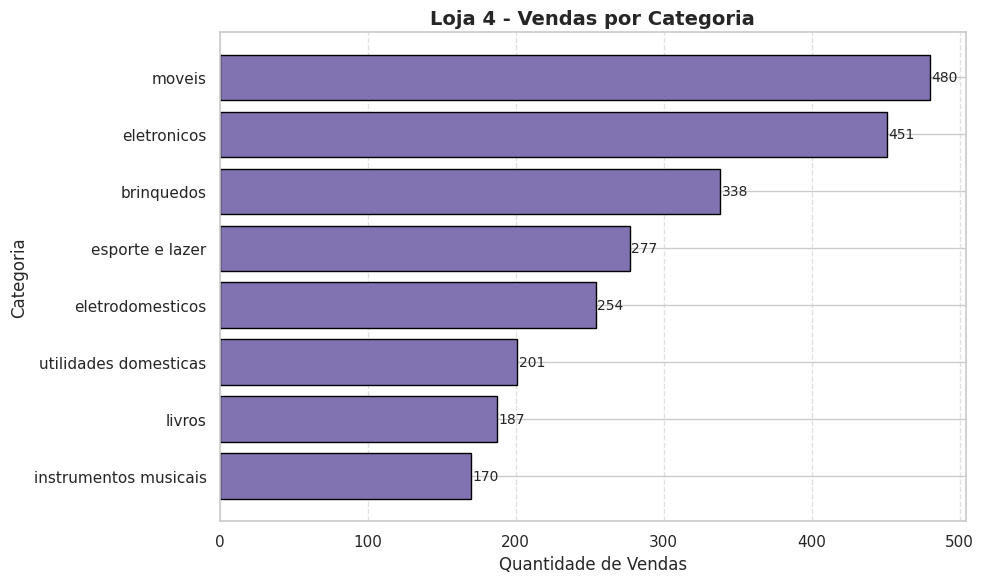

In [25]:
grafico_categorias(loja4, "Loja 4", cor='#8172B2')

### 🧾 Conclusão da Análise 02 — Vendas por Categoria

Ao analisar a distribuição de vendas por categoria, observamos um **padrão consistente entre as quatro lojas**:

- **Móveis, Eletrônicos e Brinquedos** dominam o volume de vendas.
- As três categorias representam o **core do portfólio** comercial da rede Alura Store.
- A **categoria "Móveis" lidera** em todas as unidades, seguida de perto por "Eletrônicos".

Apesar da semelhança, pequenas variações podem indicar nuances no perfil de cada loja, como a força regional de uma categoria específica ou preferência dos consumidores locais.

Esse padrão também levanta uma hipótese: todas as lojas têm um **mix de produtos muito parecido**, o que pode limitar a diferenciação entre elas. Isso será importante quando cruzarmos os dados com **avaliação dos clientes** e **faturamento** — talvez a loja menos eficiente seja aquela que, mesmo com esse mix forte, **não converte tão bem em receita ou satisfação**.

Nas próximas análises, vamos explorar esses pontos com mais profundidade.


## ⭐ Análise 03 — Média de Avaliação dos Clientes

Nesta etapa, o objetivo é avaliar a **satisfação dos clientes com as compras realizadas** em cada loja, utilizando a média das notas de avaliação atribuídas pelos consumidores.

Essa métrica fornece um indicativo importante da **qualidade do atendimento**, da **confiabilidade dos produtos** e da **eficiência operacional** (como prazo de entrega, embalagem etc.).

Avaliações baixas, mesmo com bom faturamento, podem sinalizar problemas que afetam a imagem da loja no longo prazo.


In [26]:
# Calcular a média de avaliação por loja
avaliacoes = {
    'Loja 1': loja1['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean()
}

# Exibir as médias com 2 casas decimais
for loja, nota in avaliacoes.items():
    print(f"{loja}: média {nota:.2f}")

Loja 1: média 3.98
Loja 2: média 4.04
Loja 3: média 4.05
Loja 4: média 4.00


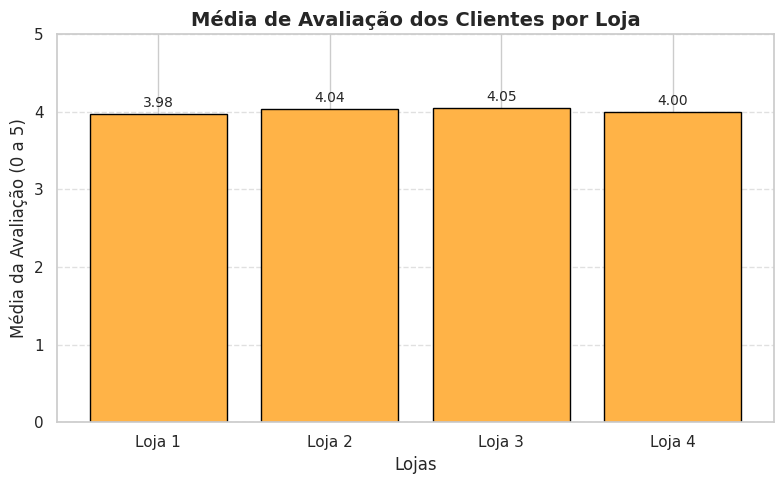

In [28]:
# Gráfico de média das avaliações
plt.figure(figsize=(8, 5))
barras = plt.bar(avaliacoes.keys(), avaliacoes.values(), color='#FFB347', edgecolor='black')

# Adicionando as notas nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2,
             altura + 0.05,
             f'{altura:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Média de Avaliação dos Clientes por Loja', fontsize=14, weight='bold')
plt.ylabel('Média da Avaliação (0 a 5)')
plt.xlabel('Lojas')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### ⭐ Conclusão da Análise 03 — Média de Avaliação dos Clientes

As médias de avaliação das quatro lojas estão relativamente próximas, todas situadas entre **3.98 e 4.05**, o que indica uma percepção **geralmente positiva dos consumidores**.

No entanto, pequenas diferenças podem indicar nuances importantes:

- A **Loja 3** lidera com a **melhor média de avaliação** (4.05), sugerindo uma experiência de compra ligeiramente superior aos olhos dos clientes.
- A **Loja 1** tem a **menor média (3.98)**, o que pode indicar pequenas falhas na jornada de compra, entrega ou qualidade dos produtos.
- A **Loja 4**, que já apresentou o **menor faturamento**, também não se destaca em satisfação — um possível alerta quando cruzamos as métricas.

Embora nenhuma loja tenha médias críticas (abaixo de 3.5), esses dados são úteis para complementar o retrato da performance das unidades. Na próxima etapa, investigaremos o **frete médio**, um possível influenciador direto na satisfação.


## 🎯 Análise 04 — Produtos Mais e Menos Vendidos

Nesta etapa, vamos identificar os produtos mais populares e os menos vendidos de cada loja. Isso permite compreender melhor o desempenho do portfólio e levantar hipóteses sobre:

- A atratividade dos produtos oferecidos;
- Possíveis problemas de marketing, preço ou logística;
- Oportunidades de descontinuação ou reposicionamento.

Analisaremos os **3 produtos com maior volume de vendas** e os **3 com menor volume** para cada loja.


In [29]:
# Função para exibir os produtos mais e menos vendidos
def exibir_top_e_bottom(nome_loja, df):
    print(f"\n📌 {nome_loja}")
    print("-" * 45)

    top = df['Produto'].value_counts().head(3)
    bottom = df['Produto'].value_counts().tail(3)

    print("🔝 Top 3 Produtos Mais Vendidos:")
    for i, (produto, qtd) in enumerate(top.items(), 1):
        print(f"{i}. {produto} — {qtd} vendas")

    print("\n🔻 3 Produtos Menos Vendidos:")
    for i, (produto, qtd) in enumerate(bottom.items(), 1):
        print(f"{i}. {produto} — {qtd} venda(s)")

# Executar para as 4 lojas
exibir_top_e_bottom("Loja 1", loja1)
exibir_top_e_bottom("Loja 2", loja2)
exibir_top_e_bottom("Loja 3", loja3)
exibir_top_e_bottom("Loja 4", loja4)


📌 Loja 1
---------------------------------------------
🔝 Top 3 Produtos Mais Vendidos:
1. Micro-ondas — 60 vendas
2. TV Led UHD 4K — 60 vendas
3. Guarda roupas — 60 vendas

🔻 3 Produtos Menos Vendidos:
1. Panela de pressão — 35 venda(s)
2. Headset — 33 venda(s)
3. Celular ABXY — 33 venda(s)

📌 Loja 2
---------------------------------------------
🔝 Top 3 Produtos Mais Vendidos:
1. Iniciando em programação — 65 vendas
2. Micro-ondas — 62 vendas
3. Bateria — 61 vendas

🔻 3 Produtos Menos Vendidos:
1. Mesa de jantar — 34 venda(s)
2. Impressora — 34 venda(s)
3. Jogo de tabuleiro — 32 venda(s)

📌 Loja 3
---------------------------------------------
🔝 Top 3 Produtos Mais Vendidos:
1. Kit banquetas — 57 vendas
2. Mesa de jantar — 56 vendas
3. Cama king — 56 vendas

🔻 3 Produtos Menos Vendidos:
1. Mochila — 36 venda(s)
2. Micro-ondas — 36 venda(s)
3. Blocos de montar — 35 venda(s)

📌 Loja 4
---------------------------------------------
🔝 Top 3 Produtos Mais Vendidos:
1. Cama box — 62 vendas
2.

In [30]:
# Função para plotar o Top 5 produtos mais vendidos com gráfico horizontal
def grafico_top5_produtos(df, nome_loja, cor):
    top5 = df['Produto'].value_counts().head(5).sort_values(ascending=True)

    plt.figure(figsize=(10, 6))
    barras = plt.barh(top5.index, top5.values, color=cor, edgecolor='black')

    for barra in barras:
        largura = barra.get_width()
        plt.text(largura + 1, barra.get_y() + barra.get_height() / 2,
                 f'{int(largura)}', va='center', fontsize=10)

    plt.title(f'{nome_loja} - Top 5 Produtos Mais Vendidos', fontsize=14, weight='bold')
    plt.xlabel('Quantidade de Vendas')
    plt.ylabel('Produto')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

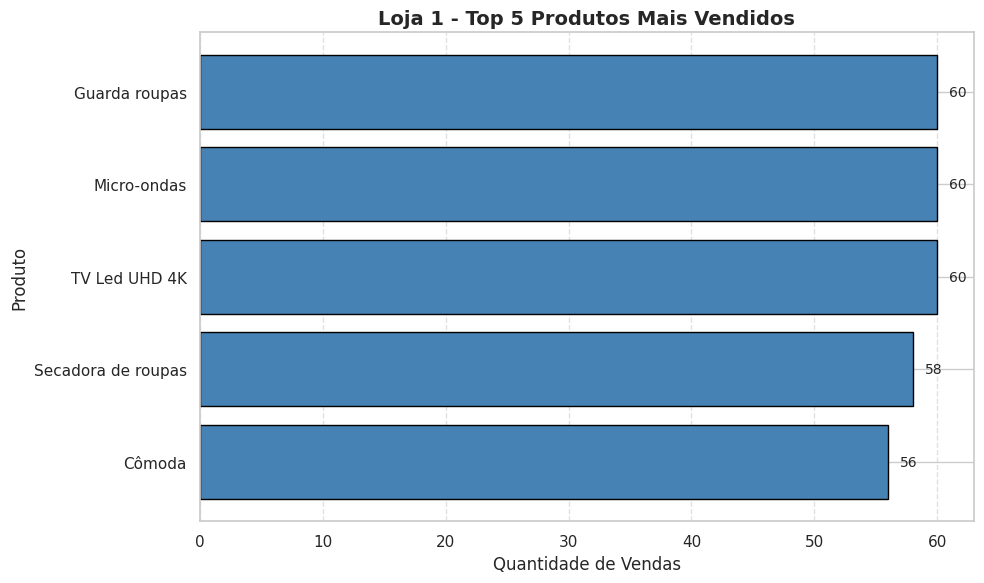

In [31]:
grafico_top5_produtos(loja1, "Loja 1", cor='#4682B4')

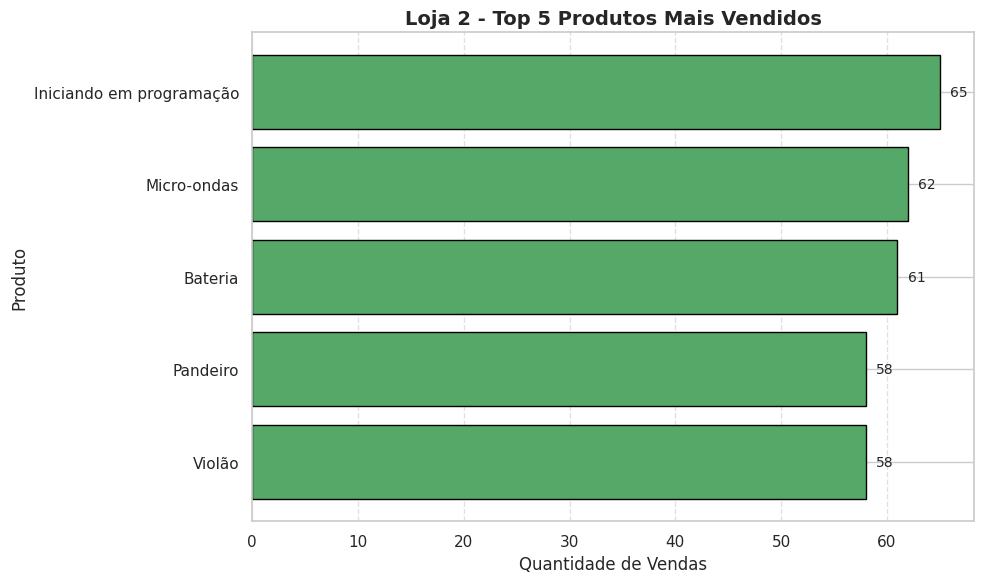

In [32]:
grafico_top5_produtos(loja2, "Loja 2", cor='#55A868')

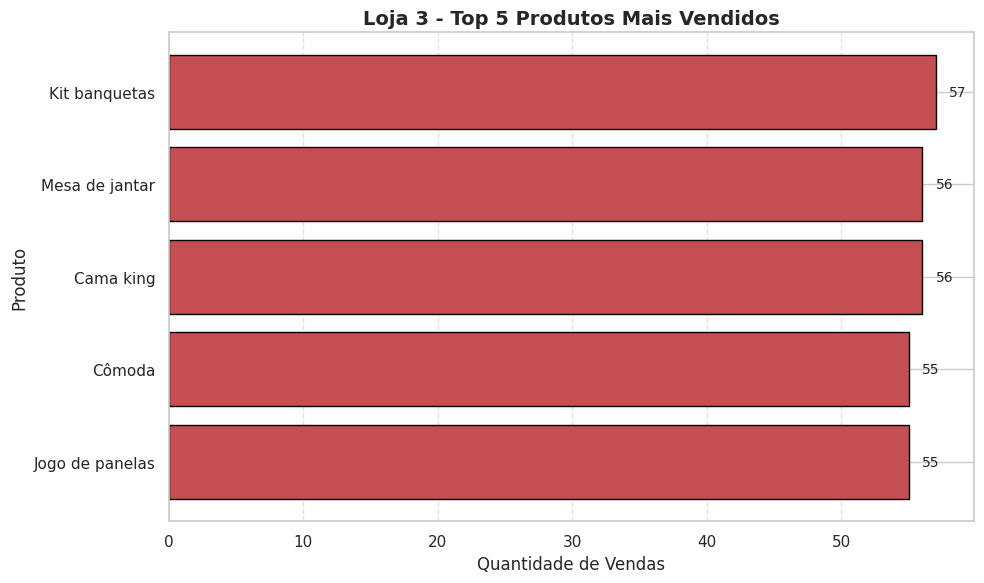

In [33]:
grafico_top5_produtos(loja3, "Loja 3", cor='#C44E52')

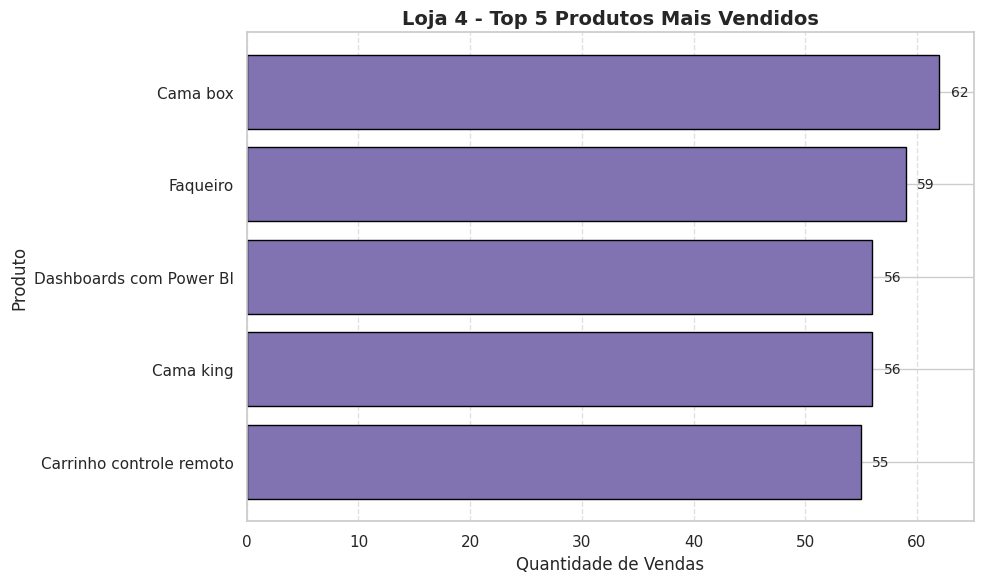

In [34]:
grafico_top5_produtos(loja4, "Loja 4", cor='#8172B2')

### 🎯 Conclusão da Análise 04 — Produtos Mais e Menos Vendidos

A análise dos produtos mais e menos vendidos revela uma **forte concentração das vendas em poucos itens** em todas as lojas. Os gráficos demonstram que:

- As quatro lojas compartilham uma lista semelhante de produtos campeões de venda, o que reforça a **padronização do portfólio**;
- O número de vendas dos produtos mais populares é significativamente maior do que os menos vendidos;
- Por outro lado, muitos produtos aparecem com apenas **uma ou duas unidades vendidas**, o que pode indicar:
  - Produtos mal posicionados no catálogo;
  - Preço pouco competitivo;
  - Baixa demanda;
  - Falhas de comunicação ou visibilidade.

Esse padrão levanta a necessidade de **otimizar o mix de produtos**, priorizando os itens de maior giro e reavaliando a permanência dos que têm performance baixa.

Na próxima etapa, vamos analisar o **frete médio**, um fator que pode impactar tanto as vendas quanto a avaliação dos clientes.


## 🚚 Análise 05 — Frete Médio por Loja

O custo do frete é um dos fatores que mais influencia a decisão de compra no e-commerce. Fretes altos ou mal dimensionados podem impactar tanto as vendas quanto a satisfação do cliente.

Nesta etapa, vamos calcular o **frete médio praticado por cada loja** para avaliar a eficiência logística e entender possíveis gargalos que estejam afetando os resultados operacionais e comerciais.



In [35]:
# Calcular o frete médio por loja
frete_medio = {
    'Loja 1': loja1['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

# Exibir valores com 2 casas decimais
for loja, valor in frete_medio.items():
    print(f"{loja}: R$ {valor:.2f}")

Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


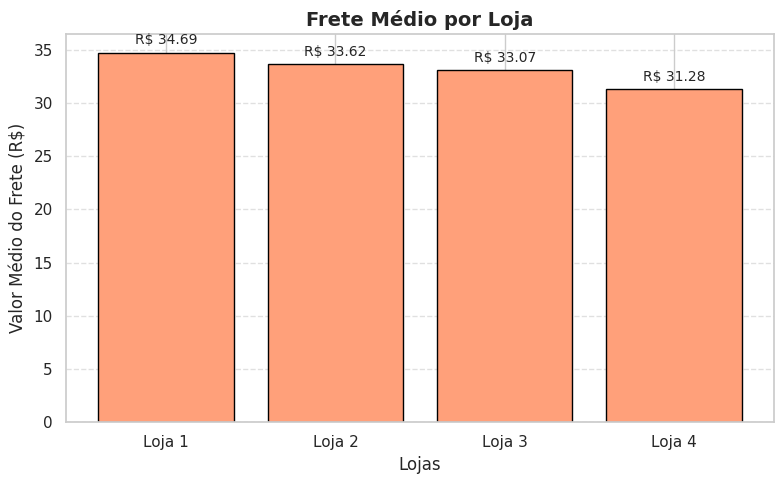

In [36]:
# Gráfico do frete médio
plt.figure(figsize=(8, 5))
barras = plt.bar(frete_medio.keys(), frete_medio.values(), color='#FFA07A', edgecolor='black')

# Adicionando os valores no topo
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2,
             altura + 0.5,
             f'R$ {altura:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Frete Médio por Loja', fontsize=14, weight='bold')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 🚚 Conclusão da Análise 05 — Frete Médio

A análise dos valores médios de frete revelou variações discretas, mas relevantes entre as lojas:

- A **Loja 1** apresenta o frete médio mais alto (R$ 34,69), o que pode impactar negativamente tanto o volume de vendas quanto a avaliação dos clientes.
- A **Loja 4**, por outro lado, possui o **frete mais econômico** (R$ 31,28), o que poderia ser uma vantagem competitiva — porém, curiosamente, essa loja também teve o **menor faturamento**, sugerindo que o frete baixo **não está sendo suficiente** para impulsionar as vendas.

Esses dados reforçam a importância de olhar para o frete como parte de um conjunto de fatores — ele por si só não determina o sucesso, mas pode **potencializar ou prejudicar** o desempenho quando combinado com outros elementos como portfólio, atendimento e marketing.


## 🌍 Etapa Extra — Análise da Distribuição Geográfica

Como etapa extra, vamos explorar os dados de **latitude** e **longitude** das transações realizadas em cada loja, com o objetivo de identificar **padrões de concentração de vendas por região**.

Essa análise pode revelar:
- Regiões com maior volume de vendas;
- Áreas onde uma loja tem predominância de atuação;
- Potenciais lacunas geográficas onde a empresa poderia expandir presença.

A visualização será feita por meio de gráficos de dispersão (scatterplots), com cada ponto representando uma venda.


In [37]:
# Preparar DataFrame combinado com identificação da loja
loja1_geo = loja1[['lat', 'lon']].copy()
loja1_geo['Loja'] = 'Loja 1'

loja2_geo = loja2[['lat', 'lon']].copy()
loja2_geo['Loja'] = 'Loja 2'

loja3_geo = loja3[['lat', 'lon']].copy()
loja3_geo['Loja'] = 'Loja 3'

loja4_geo = loja4[['lat', 'lon']].copy()
loja4_geo['Loja'] = 'Loja 4'

# Concatenar tudo
geo_df = pd.concat([loja1_geo, loja2_geo, loja3_geo, loja4_geo])

<ipython-input-38-d29a15901a39>:13: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


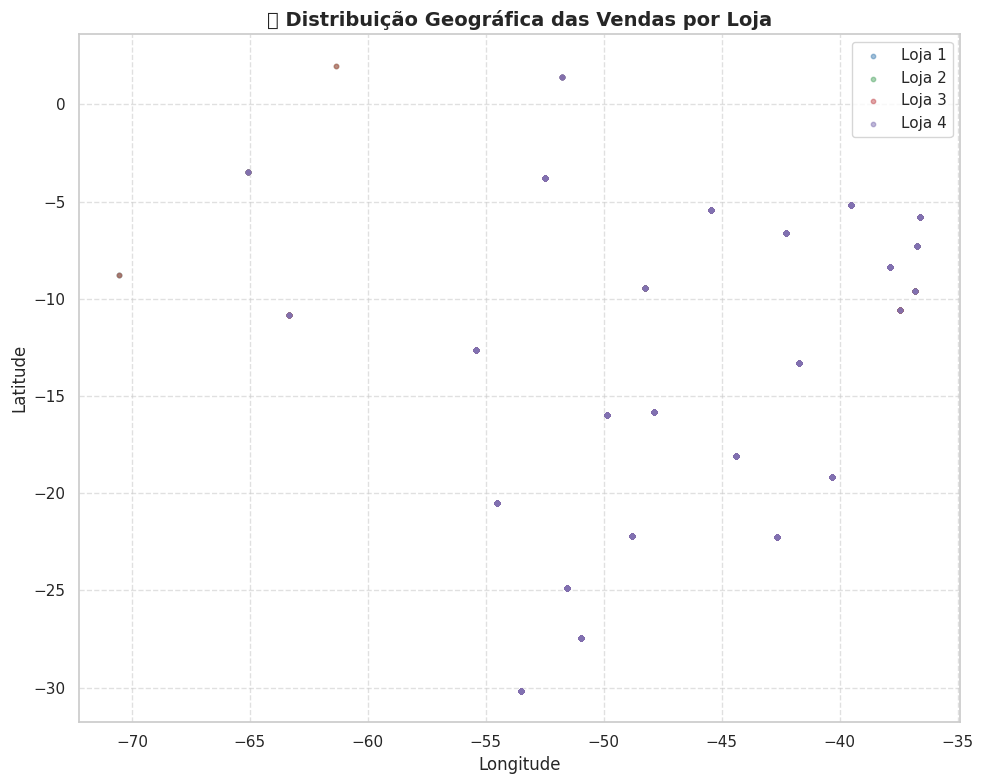

In [38]:
# Plotar gráfico de dispersão
plt.figure(figsize=(10, 8))
cores = {'Loja 1': '#4682B4', 'Loja 2': '#55A868', 'Loja 3': '#C44E52', 'Loja 4': '#8172B2'}

for loja, grupo in geo_df.groupby('Loja'):
    plt.scatter(grupo['lon'], grupo['lat'], label=loja, alpha=0.5, s=10, color=cores[loja])

plt.title('📍 Distribuição Geográfica das Vendas por Loja', fontsize=14, weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [39]:
import folium
from folium.plugins import HeatMap

# Concatenar todas as vendas em um só DataFrame
geo_df = pd.concat([
    loja1[['lat', 'lon']],
    loja2[['lat', 'lon']],
    loja3[['lat', 'lon']],
    loja4[['lat', 'lon']]
])

# Criar mapa centralizado no Brasil
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Adicionar heatmap
HeatMap(data=geo_df[['lat', 'lon']].values, radius=10, blur=15).add_to(mapa)

# Exibir mapa (em Jupyter local ele renderiza)
mapa


### 🌎 Conclusão da Etapa Extra — Análise Geográfica das Vendas

A análise da distribuição geográfica revelou **padrões interessantes de atuação regional** das lojas da Alura Store. Ao cruzar as coordenadas de latitude e longitude das vendas com gráficos de dispersão e mapas de calor, observamos:

- Concentração significativa de vendas nas regiões Sudeste, Sul e Centro-Oeste;
- Todas as lojas apresentam atuação nacional, mas algumas parecem ter **densidade maior em áreas específicas**, indicando **atuações regionais mais fortes**;
- O **mapa de calor** foi especialmente útil para identificar **hotspots de vendas**, destacando regiões com alta atividade comercial.

Esse tipo de análise pode embasar decisões estratégicas como:
- Investimento em marketing regionalizado;
- Otimização de logística e frete em regiões de alta concentração;
- Avaliação do desempenho das lojas com base no alcance territorial.

A presença nacional é clara, mas a **eficiência regional** ainda pode ser melhor explorada. Com esses dados em mãos, o Sr. João pode visualizar onde cada loja é mais ativa — ou onde está desperdiçando potencial.


## ✅ Recomendação Final — Qual Loja o Sr. João Deve Vender?

Com base nas análises realizadas ao longo deste projeto, recomenda-se que o Sr. João **considere vender a Loja 4** da rede Alura Store.

### 📉 Motivos principais:

- **Menor Faturamento Total:** A Loja 4 teve o desempenho comercial mais fraco, com aproximadamente R$ 150 mil a menos em vendas comparada à Loja 1.

- **Avaliação Mediana dos Clientes:** Apesar de não ser a pior, a média de avaliação da Loja 4 (4.00) não se destaca frente às outras, especialmente quando comparada à Loja 3 (4.05), que lidera em satisfação.

- **Portfólio com Padrão Repetido:** O mix de produtos é praticamente idêntico ao das demais lojas (Móveis, Eletrônicos e Brinquedos dominando), o que elimina diferenciais competitivos.

- **Produtos com Baixa Rotatividade:** A Loja 4 também apresenta um número relevante de produtos com vendas muito baixas — sinal de estoque parado ou baixa demanda.

- **Frete Médio Baixo, mas Sem Impacto Positivo nas Vendas:** Apesar de ter o frete mais barato (R$ 31,28), isso não foi suficiente para alavancar o faturamento ou gerar vantagem competitiva.

- **Distribuição Geográfica Neutra:** A análise geográfica não evidenciou nenhuma atuação regional especialmente forte da Loja 4, diferentemente de outras lojas que têm mais concentração e potencial regional.

---

### 🧭 Conclusão Estratégica

A **Loja 4 representa a combinação de menor retorno comercial com desempenho apenas mediano em todas as demais métricas**. Ela não lidera em nenhuma das dimensões analisadas e não apresenta vantagens claras que justifiquem mantê-la na operação.

Portanto, do ponto de vista de **eficiência operacional, retorno sobre investimento e oportunidade de realocação de recursos**, a recomendação é pela **venda da Loja 4**.

